# Analysis
## Signal Structure
* 신호에 대한 데이터는 모두 동일한 규격을 갖는다.
    * fs, sig_len, n_sig, base_date, base_time, units, sig_name 모두 통일된 구조
    * base_time과 base_date는 얼만큼의 시간동안 측정되었고, 언제 측정하였는가를 담고있다.
* * * 
## comments의 diagnoses와 outcome
### 1. diagnoses (진단)
* SAH (Subarachnoid Hemorrhage): 뇌동맥류 파열이나 외상 등에 의해 뇌의 지주막하 공간에 출혈이 발생하는 상태를 의미합니다. 급성 뇌혈관 질환 중 하나로, 신속한 치료가 필요합니다.
* SDH (Subdural Hemorrhage): 경막 아래 공간에 출혈이 발생하는 것을 의미합니다. 외상으로 인해 발생하는 경우가 많고, 급성 또는 만성으로 진행될 수 있습니다.
* TBI (Traumatic Brain Injury): 외상에 의해 발생한 뇌 손상으로, 뇌진탕, 출혈, 타박상 등을 포함합니다. 증상의 범위가 넓고, 치료와 재활 과정이 필요할 수 있습니다.
* CVA (Cerebrovascular Accident): 흔히 뇌졸중으로 알려진 상태로, 뇌혈관이 막히거나 터지면서 뇌에 손상이 생기는 것을 의미합니다.
* ICH (Intracerebral Hemorrhage): 뇌 내 출혈을 의미하며, 뇌혈관이 터져서 뇌 조직 내로 혈액이 고이는 상태입니다. 고혈압이나 뇌동맥류 파열 등으로 발생할 수 있습니다.
### 2. outcome (결과)
* Rehab (Rehabilitation): 환자가 치료 후 재활 과정을 거치는 상태를 의미합니다. 완전한 회복이 아닌 경우도 많아, 기능 회복을 목표로 한 재활이 필요합니다.
* Home: 환자가 퇴원 후 집으로 돌아가거나, 자택에서의 회복을 의미합니다. 경우에 따라 지속적인 외래 진료가 필요할 수도 있습니다.
* Expired: 환자가 치료 중 사망했음을 의미합니다.
* * *
## Sampling
* 또한, 신호의 길이는 모두 다르기에 몇 초로 샘플의 크기를 가져야할 것인지는 검토를 해보아야 할 사항이다.
* * *
## Visualization

In [46]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

In [47]:
sample = wfdb.rdsamp('charis-database-1.0.0/charis1')

In [48]:
print(sample[0].shape)

for key, value in sample[1].items():
    print(f"{key}: {value}")

(12239851, 3)
fs: 50
sig_len: 12239851
n_sig: 3
base_date: None
base_time: None
units: ['mmHg', 'mV', 'mmHg']
sig_name: ['ABP', 'ECG', 'ICP']
comments: ['<age>: 19  <sex>: M  <diagnoses>: (SAH/SDH/TBI)  <outcome>: Rehab']


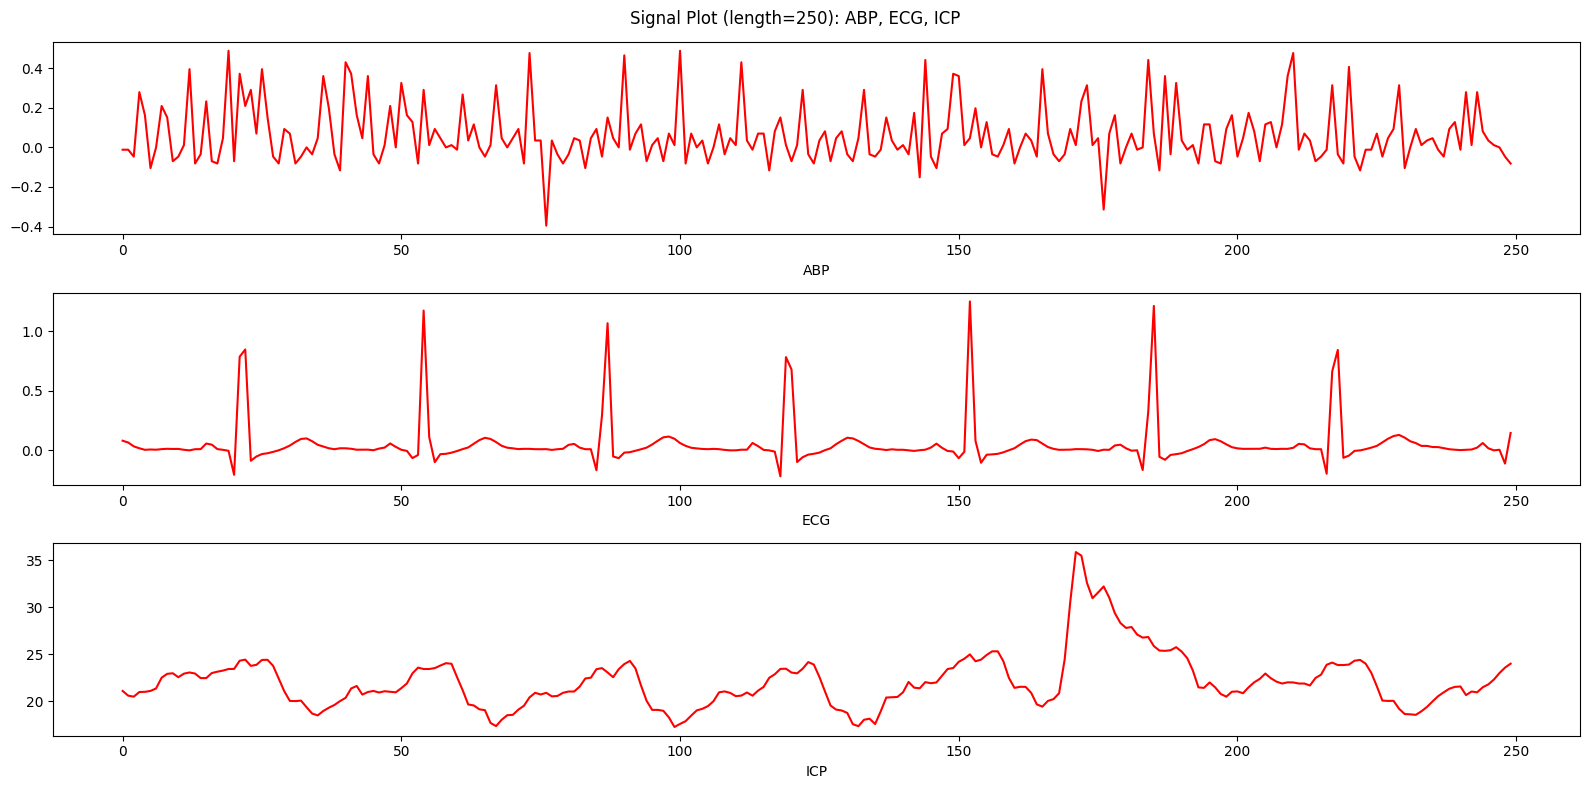

In [ ]:
length_range = 250 # 50Hz, 5초
sample = (sample[0][:length_range], sample[1]) # 샘플 길이가 너무 길어서 250개의 time step으로 시각화

x = np.arange(0, len(sample[0][:, 0]), 1)

fig, axes = plt.subplots(3, 1, figsize=(16, 8))

axes[0].plot(x, sample[0][:, 0], color='r')
axes[0].set_xlabel(f"{sample[1]['sig_name'][0]}")
axes[1].plot(x, sample[0][:, 1], color='r')
axes[1].set_xlabel(f"{sample[1]['sig_name'][1]}")
axes[2].plot(x, sample[0][:, 2], color='r')
axes[2].set_xlabel(f"{sample[1]['sig_name'][2]}")

plt.suptitle(f"Signal Plot (length={length_range}): ABP, ECG, ICP")
plt.tight_layout()
plt.show()

In [50]:
# 1~13
def print_metadata(key):
    '''
    환자의 Signal에 대한 metadata를 출력하는 함수
    '''
    for i in range(1, 13+1):
        sample = wfdb.rdsamp(f'charis-database-1.0.0/charis{i}',
                             sampfrom=0,
                             sampto=1)
        print(f"{key}: {sample[1][key]}")

In [51]:
print_metadata('fs')

fs: 50
fs: 50
fs: 50
fs: 50
fs: 50
fs: 50
fs: 50
fs: 50
fs: 50
fs: 50
fs: 50
fs: 50
fs: 50


In [52]:
print_metadata('sig_len')

sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1
sig_len: 1


In [53]:
print_metadata('n_sig')

n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3
n_sig: 3


In [54]:
print_metadata('base_date')

base_date: None
base_date: None
base_date: None
base_date: None
base_date: None
base_date: None
base_date: None
base_date: None
base_date: None
base_date: None
base_date: None
base_date: None
base_date: None


In [55]:
print_metadata('base_time')

base_time: None
base_time: None
base_time: None
base_time: None
base_time: None
base_time: None
base_time: None
base_time: None
base_time: None
base_time: None
base_time: None
base_time: None
base_time: None


In [56]:
print_metadata('units')

units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']
units: ['mmHg', 'mV', 'mmHg']


In [57]:
print_metadata('sig_name')

sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']
sig_name: ['ABP', 'ECG', 'ICP']


In [58]:
print_metadata('comments')

comments: ['<age>: 19  <sex>: M  <diagnoses>: (SAH/SDH/TBI)  <outcome>: Rehab']
comments: ['<age>: 25  <sex>: M  <diagnoses>: (SAH/SDH/TBI)  <outcome>: Rehab']
comments: ['<age>: 74  <sex>: M  <diagnoses>: (SDH/TBI)  <outcome>: Rehab']
comments: ['<age>: 44  <sex>: F  <diagnoses>: (CVA)  <outcome>: Rehab']
comments: ['<age>: 21  <sex>: F  <diagnoses>: (SDH/TBI)  <outcome>: Rehab']
comments: ['<age>: 20  <sex>: M  <diagnoses>: (TBI)  <outcome>: Rehab']
comments: ['<age>: 73  <diagnoses>: (SAH)  <outcome>: Rehab']
comments: []
comments: ['Intermittent,discontinuous ICP signal', 'Patient disconnected at end of recording']
comments: []
comments: ['<age>: 69  <sex>: F  <diagnoses>: (SDH)  <outcome>: Rehab']
comments: ['<age>: 55  <sex>: F  <diagnoses>: (SDH)  <outcome>: Rehab/Home']
comments: ['<age>: 60  <sex>: M  <diagnoses>: (ICH/SDH)  <outcome>: Expired']
